# Introduction: Insights from "Helpful" Product Reviews

Many e-commerce sites offer users the opportunity to post their own reviews of products they have purchased. These reviews contain a wealth of information about users' experiences with a company's products, and other users may read these reviews when considering making a purchase. But because reviews consist mainly of user-generated text, it can be difficult for a business to extract insights from thousands of them. 

On some e-commerce sites, users have the opportunity to rate another user's product review as "helpful" or not, and analyzing these "helpful" reviews can help a business understand what its customers want to know about its products before buying.

This project aims to answer these two questions:
- What can we learn about a business's products and its customers from user-generated reviews that were rated "helpful" by other users?
- Can we predict whether a review will be rated "helpful" using machine learning or deep learning?

The [dataset I used for this project comes from Amazon (via Kaggle)](https://www.kaggle.com/snap/amazon-fine-food-reviews) and consists of over 500,000 reviews, mostly of food products, written between 2002 and 2012.

## Summay of findings

(For more, see _Interpretations and Recommendations_ below.)

- a
- b
- c

## Costs and benefits of this project

Any data science project can have costs and benefits, both in terms of resources like time and computing power, and in terms of the project's potential impact on human beings. Here is a summary of what I see as the pros and cons of the work I do here:

_Benefits_
- A business can learn about its products and customers.
- If a business improves its product or website based on things learned here, customers may have a better user experience.

_Costs_
- Machine learning, and especially deep learning, can be costly in terms of labor, computing power, and energy use.
- The dataset consists of user-generated reviews, and some users could potentially be identified by their profile names or by information they provided in their reviews. Although users originally posted their reviews knowing that they would be publicly visible, they did not have the opportunity to choose whether their data would appear in this dataset. 

## About this repo

This repository contains the following files:
- a
- b
- c

The full dataset can be downloaded at [https://www.kaggle.com/snap/amazon-fine-food-reviews](https://www.kaggle.com/snap/amazon-fine-food-reviews).

For more technical details, see the Appendix below.

# Analysis of "helpful" reviews

What can we learn about a business's products and its customers from user-generated reviews that were rated "helpful" by other users? In this section I try to discover the following:

- Key words and phrases in "helpful" v. unhelpful (or unrated) reviews
- Any relationships between "helpfulness" and a review's positivity, length, or other features
- Any patterns in the content, structure, or narrative style of "helpful" reviews that might inform business decisions (particularly decisions about how to describe products on the company website)
- Problems or weird things to watch out for in a collection of user-generated reviews

## Load data

Let's load in the data so we can get started.

In [11]:
# Load the first packages we'll need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Read in the data
data = pd.read_csv('./data/Reviews.csv')
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
# View the column datatypes and counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568427 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


The dataset contains the following variables:
- `Id`: a unique identifier for each review
- `ProductId`: a unique identifier for each product being reviewed
- `UserId`: a unique identifier for each reviewer
- `ProfileName`: the display name of each reviewer
- `HelpfulnessNumerator`: the number of "helpful" votes each review received
- `HelpfulnessDenominator`: the total number of votes on helpfulness (upvotes and downvotes)
- `Score`: the reviewer's rating of the product, in number of stars from 1 to 5
- `Time`: a timestamp for each review
- `Summary`: a brief headline or title for each review
- `Text`: the text of each review.

`HelpfulnessNumerator` is the target I'll try to predict in the modeling section below. For most of my analysis, I focus on `Text`. I don't use `Time` at all because I expect that most interaction with product reviews is asynchronous, i.e., a review could be written and then rated "helpful" the same day or years later.

## Initial exploration and cleaning

### Check for duplicates

With such a large dataset, one of my first concerns is whether it contains many duplicate entries. In particular, I am concerned about:

- true duplicate entries, i.e., the exact same review of the same product by the same person, and
- "spam" entries, i.e., the exact same text posted to multiple products.

In [0]:
# Check for multiple reviews of same product
data.ProductId.value_counts()

B007JFMH8M    913
B0026RQTGE    632
B002QWP89S    632
B002QWHJOU    632
B002QWP8H0    632
             ... 
B008QPBSXE      1
B001YJ2VGM      1
B003PM4X9E      1
B004D6UAWK      1
B0084JFD7E      1
Name: ProductId, Length: 74258, dtype: int64

It makes sense that there would be multiple reviews of some products, so these value counts are not unexpected. 

In [0]:
# Check for multiple reviews by same user
data.UserId.value_counts()

A3OXHLG6DIBRW8    448
A1YUL9PCJR3JTY    421
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
                 ... 
A1N15DDUYPDXVO      1
A2JXHUQYM3OXH7      1
A2B8TQ3M0VRKV8      1
A3EEZ8YWOTBR2W      1
A36ZJ8VITNWRBC      1
Name: UserId, Length: 256059, dtype: int64

It's also reasonable that some reviewers write many reviews, but 448 reviews is quite a lot! Let's see how many times the same combinations of products and reviewers are repeated.

In [0]:
# Look for duplicate reviews using ProductId + UserId
dupes = data.duplicated(subset=['ProductId', 'UserId'])
dupes.sum()

7650

So it seems there may be 7,650 times where the same user reviewed the same product more than once. Let's try to inspect some examples and see if we can figure out what's going on.

In [0]:
# Investigate a potential duplicate reviewer
dupes[dupes == True]

426       True
429       True
435       True
467       True
485       True
          ... 
568056    True
568060    True
568062    True
568067    True
568144    True
Length: 7650, dtype: bool

I'll focus on the review at index 429. 

In [0]:
# Investigate a potential duplicate reviewer
data.iloc[429,]

Id                                                                                                                                                                                                                                                                                                                                                                                       430
ProductId                                                                                                                                                                                                                                                                                                                                                                         B000G6RYNE
UserId                                                                                                                                                                                                                                        

At first glance, I have no reason to believe that this is not a legitimate review, other than the fact that it was flagged as a duplicate. The `ProfileName` sounds like a real person (not a garbled alphanumeric string like I might expect from a bot), and the review reads like something a real person might say. There are no phishy-looking links or other weird things in the text itself.

Let's take a deeper dive into "Scrapper's" reviews.

In [0]:
# Check out all reviews by 'Scrapper'
scrapper = data[data.UserId == 'A1IRN1M05TPOVT']
scrapper.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,49.000000,49.000000,49.000000,49.000000,4.900000e+01
mean,309519.102041,0.224490,0.224490,4.979592,1.319677e+09
std,192180.078790,0.654004,0.654004,0.142857,2.135026e+07
min,424.000000,0.000000,0.000000,4.000000,1.243901e+09
25%,112884.000000,0.000000,0.000000,5.000000,1.316477e+09
50%,331780.000000,0.000000,0.000000,5.000000,1.331078e+09
75%,481356.000000,0.000000,0.000000,5.000000,1.334621e+09
max,552864.000000,4.000000,4.000000,5.000000,1.334621e+09


"Scrapper" seems to have very positive opinions of the products she reviews, although she doesn't score a lot of "helpful" ratings.

How many duplicate reviews has she produced?

In [0]:
# See how many potentially duplicate reviews Scrapper produced
scrapper.ProductId.value_counts()

B0058AMY5G    2
B000LKXBL4    2
B001SAXPEO    2
B0058AMY10    2
B000G6MBUA    2
B000LKVD5U    2
B0012XBD7I    2
B006WYSFZK    2
B000G6RYNE    2
B004728MI4    2
B00472I5A4    2
B0058AMYTC    2
B0058AMY74    2
B000G6O2QG    2
B005C955WC    1
B00018CWZW    1
B000KGW2BY    1
B004ASBLJ2    1
B000H27NU6    1
B00017LEZC    1
B000EQT77M    1
B003FDG468    1
B001HBXO54    1
B003V8QGAG    1
B0089Q2AAA    1
B003ZXFWP2    1
B003V8Y7DE    1
B004VJ9UCA    1
B0089Q2A8M    1
B000EQX6QK    1
B003V8WNIK    1
B002DZIL24    1
B000HVVMQI    1
B002YJCA30    1
B000E1FZIW    1
Name: ProductId, dtype: int64

It looks like she reviewed the first 14 products twice each. That's weird, but not _that_ weird; maybe she just wanted to review those products more than once.

What about the texts of her reviews? Are they duplicated?

In [0]:
# View Scrapper's duplicate reviews
scrapper.Text.value_counts()

I have never met a Kettle brand chip I did not like. These chips have a great loaded potato flavor, which are flavorful. I like the sweet onion chips better, but these are also at the top of the list for great-tasting potato chips. Kettle chips are great chips f/the money!                                                                                     14
WOW!  I have eaten quite a few potato chips in my day. Kettle chips are the BEST non-baked chips I have eaten. I decided to try the sweet onion chips, since I've never had them. I now have a FAVORITE!! If you like onions, this is a MUST buy! I will definitely reorder these, as I mentioned above, they are the BEST I have ever eaten! The flavor is GREAT.    14
These are some of the BEST chips I have ever eaten! Since they were popped and not fried, they have a fresh, non-greasy taste! I would recommend these to anyone watching their diet. FANTASTIC!!                                                                                     

"Scrapper" has written 36 non-unique reviews. Something is fishy! Why would a person post the exact same review 14 times across various products? This is not behavior I would expect from a "normal" customer who is leaving genuine reviews on products they actually purchased. 

Are there other "Scrappers" in this dataset?

In [5]:
# Find all duplicate review texts
data.Text.value_counts()[:2]

This review will make me sound really stupid, but whatever. I don't really care as long as people find out what's real and can avoid my mistakes.<br /><br />I got my wonderful little sweet Bella Bean when she was a few days shy of three years old. She had been bounced around from house to house and eating whatever was cheap. I have had cats around me my entire life, for about twenty-five years now. My mother always just fed them whatever, the kinds of food you buy in the supermarket - Friskies, Nine Lives, Kit & Kaboodle, stuff like that. And our cats were always fine, at least in terms of their eating habits. They would eat in the morning, stop when they were done, come back, and eat some more when they got hungry.<br /><br />My housemate at the time was working for Hill's and assured me that this was the best food ever made, so great, so on and so forth. I now know that she is an utter buffoon, but I initially trusted her judgment, which is so unfortunate because she doesn't think. S

The first review in this printout occurs 199 times in the dataset. I can't imagine any normal circumstance under which a genuine customer would post this exact text that many times. 

I think it would be safe to consider any non-unique review text as spam and remove all but the first instance from the dataset. How many spam reviews are there?

In [4]:
# Count non-unique review texts
dupe_texts = data.duplicated(subset=['Text'])
dupe_texts[dupe_texts == True].count()

174875

Almost 175,000 of the review texts are non-unique! They must go.

In [5]:
# Select just the unique reviews
data_no_dupe_texts = data.drop_duplicates(subset=['Text'])

In [7]:
# Check counts and missing values
data_no_dupe_texts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393579 entries, 0 to 568453
Data columns (total 10 columns):
Id                        393579 non-null int64
ProductId                 393579 non-null object
UserId                    393579 non-null object
ProfileName               393568 non-null object
HelpfulnessNumerator      393579 non-null int64
HelpfulnessDenominator    393579 non-null int64
Score                     393579 non-null int64
Time                      393579 non-null int64
Summary                   393576 non-null object
Text                      393579 non-null object
dtypes: int64(5), object(5)
memory usage: 33.0+ MB


Now I can be confident that I am dealing with unique reviews. 

### Determine how to handle `HelpfulnessNumerator`

Below I'm going to use `HelpfulnessNumerator` as the target for my predictions, so first I need to know more about this variable. How is it distributed? And should I treat it as continuous or categorical?

Let's check the distribution first.

In [8]:
# Check summary stats on helpfulness votes
data_no_dupe_texts.HelpfulnessNumerator.describe()

count    393579.000000
mean          1.733535
std           6.873517
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         866.000000
Name: HelpfulnessNumerator, dtype: float64

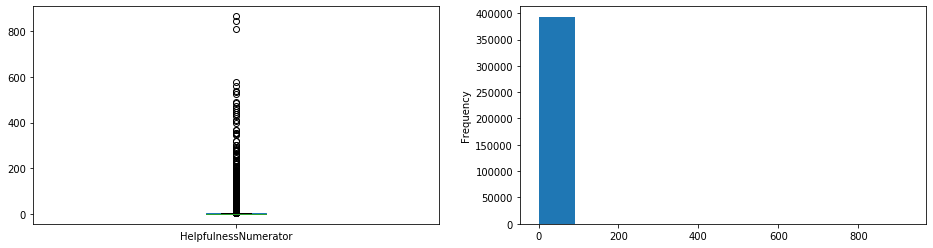

In [15]:
# Visualize the distribution of values
fig, axes = plt.subplots(1, 2, figsize=(16,4))

ax1 = axes[0]
data_no_dupe_texts.HelpfulnessNumerator.plot(kind='box', ax=ax1)

ax2 = axes[1]
data_no_dupe_texts.HelpfulnessDenominator.plot(kind='hist', ax=ax2)

plt.show();

From these plots and the summary stats above I can see that the vast majority of reviews received no "helpful" votes, while a very small number received huge numbers of "helpful" votes.

When it comes time for modeling, I will treat this as a classification problem and create a boolean column to record whether a review received 0 helpful votes or more than 0. 

### Calculate lengths of reviews

In the section below, I'm going to check for correlations between `HelpfulnessNumerator` and other variables, and I want the length of each review to be one of them. I'll calculate that here.

In [6]:
# Calculate a column for character lengths of review texts
data_no_dupe_texts['Text_len'] = [len(data_no_dupe_texts.loc[row, 'Text']) for row in data_no_dupe_texts.index]
data_no_dupe_texts.head()

/Users/jennykreiger/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_len
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,263
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,509
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,219
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,140


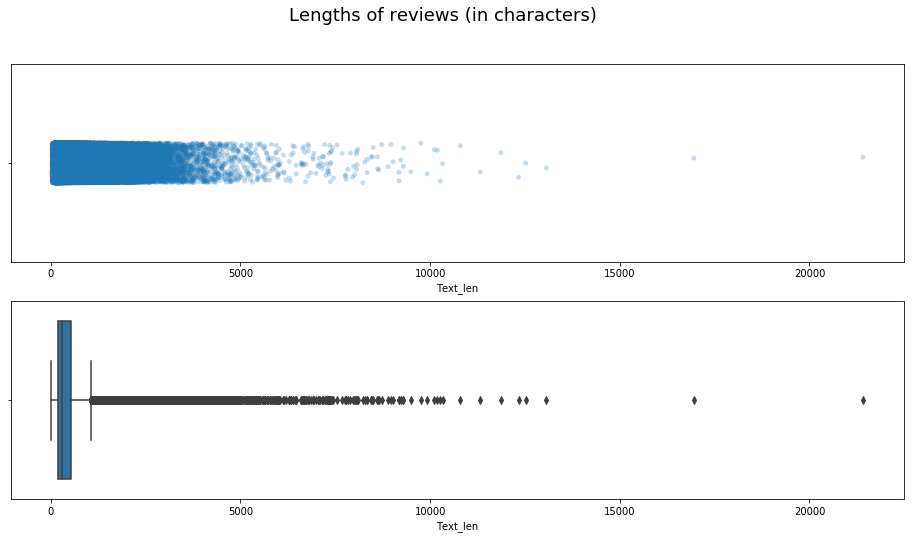

In [26]:
# Visualize lengths of reviews (in characters)
fig, axes = plt.subplots(2, 1, figsize=(16,8))
ax1 = axes[0]
sns.stripplot(x='Text_len', data=data_no_dupe_texts, alpha=0.25, ax=ax1)

ax2 = axes[1]
sns.boxplot(x='Text_len', data=data_no_dupe_texts, ax=ax2)
plt.suptitle('Lengths of reviews (in characters)', fontsize=18)

plt.show();

In [27]:
# Get summary stats on Text_len
data_no_dupe_texts.Text_len.describe()

count    393579.000000
mean        433.829178
std         433.002351
min          12.000000
25%         181.000000
50%         304.000000
75%         527.000000
max       21409.000000
Name: Text_len, dtype: float64

It appears that the vast majority of reviews are pretty short, i.e., well under 1,000 characters. But there are also some really long-winded reviews that are several thousand characters long. Apparently there was no character limit on the input form, or if there was, it was set well over 20,000 characters.

### Check for correlations with "helpfulness"

Before I go to the trouble of trying to predict helpfulness from the texts of reviews, I want to see if any of my other variables could do the same job. Here I'll check for correlations between `HelpfulnessNumerator` and several other variables, both ones that came in the dataset and some new ones I engineered.

In [38]:
# Get a copy of data_no_dupe_texts
data = data_no_dupe_texts.copy()

First, I'll create a new variable to represent how many times a product's ID occurs in the dataset.

In [39]:
# Create `ProductIdCount` variable
prod_id_counts = data.ProductId.value_counts()
data['ProductIdCount'] = [prod_id_counts[idx] for idx in data['ProductId']]

Next I'll create a boolean column to indicate whether a product's `ProductIdCount` is in the top 1%. This gives me a handy way to separate the most frequently reviewed products from those that weren't reviewed very often.

In [40]:
# Create `ProductMostReviewed` variable
data['ProductMostReviewed'] = np.where(data['ProductIdCount'] > np.quantile(prod_id_counts, 0.99), 1, 0)

Now I'll do something similar for `UserId`: calculate how many times each `UserId` occurs, and calculate whether a given `UserId` is in the top 1% most common IDs.

In [41]:
# Calculate similar columns for `UserId`
user_id_counts = data.UserId.value_counts()
data['UserIdCount'] = [user_id_counts[idx] for idx in data['UserId']]

data['TopReviewer'] = np.where(data['UserIdCount'] > np.quantile(user_id_counts, 0.99), 1, 0)

Rather than deal with the somewhat confusing `HelpfulnessDenominator` column, I will calculate the difference between it and `HelpfulnessNumerator` as a new column called `Downvotes`. This will represent the number of times someone voted negatively on the helpfulness of a review. Keep in mind that many reviews received no votes on helpfulness either way.

In [42]:
# Calculate `Downvotes` column
data['Downvotes'] = data['HelpfulnessDenominator'] - data['HelpfulnessNumerator']

Now let's take a look at all the columns just to review what we have:

In [43]:
# Check info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393579 entries, 0 to 568453
Data columns (total 16 columns):
Id                        393579 non-null int64
ProductId                 393579 non-null object
UserId                    393579 non-null object
ProfileName               393568 non-null object
HelpfulnessNumerator      393579 non-null int64
HelpfulnessDenominator    393579 non-null int64
Score                     393579 non-null int64
Time                      393579 non-null int64
Summary                   393576 non-null object
Text                      393579 non-null object
Text_len                  393579 non-null int64
ProductIdCount            393579 non-null int64
ProductMostReviewed       393579 non-null int64
UserIdCount               393579 non-null int64
TopReviewer               393579 non-null int64
Downvotes                 393579 non-null int64
dtypes: int64(11), object(5)
memory usage: 51.0+ MB


Now I'm ready to check for correlations among the variables.

In [45]:
# Calculate Pearson coefficient of correlation
data_for_corr = data.drop(['Id', 'ProductId', 'UserId', 'ProfileName', 'Time',
                           'HelpfulnessDenominator', 'Summary', 'Text'], 
                          axis=1)

data_for_corr.corr()

,HelpfulnessNumerator,Score,Text_len,ProductIdCount,ProductMostReviewed,UserIdCount,TopReviewer,Downvotes
HelpfulnessNumerator,1.000000,-0.036113,0.172175,-0.002520,0.010340,0.009040,0.005662,0.225819
Score,-0.036113,1.000000,-0.068555,-0.016376,-0.028534,0.017774,-0.003941,-0.282804
Text_len,0.172175,-0.068555,1.000000,0.076947,0.094800,0.177398,0.227655,0.061923
ProductIdCount,-0.002520,-0.016376,0.076947,1.000000,0.743660,0.010863,0.098177,0.008076
ProductMostReviewed,0.010340,-0.028534,0.094800,0.743660,1.000000,0.010548,0.102361,0.017622
UserIdCount,0.009040,0.017774,0.177398,0.010863,0.010548,1.000000,0.579754,-0.011029
TopReviewer,0.005662,-0.003941,0.227655,0.098177,0.102361,0.579754,1.000000,-0.008282
Downvotes,0.225819,-0.282804,0.061923,0.008076,0.017622,-0.011029,-0.008282,1.000000


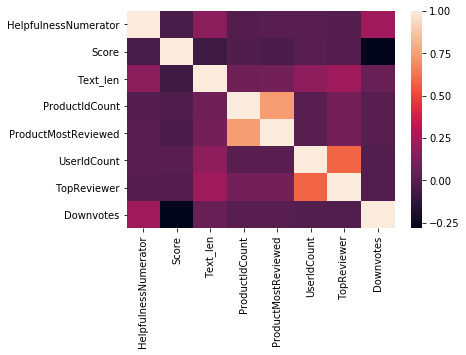

In [46]:
# Visualize correlation coefficients as a heatmap
sns.heatmap(data_for_corr.corr());

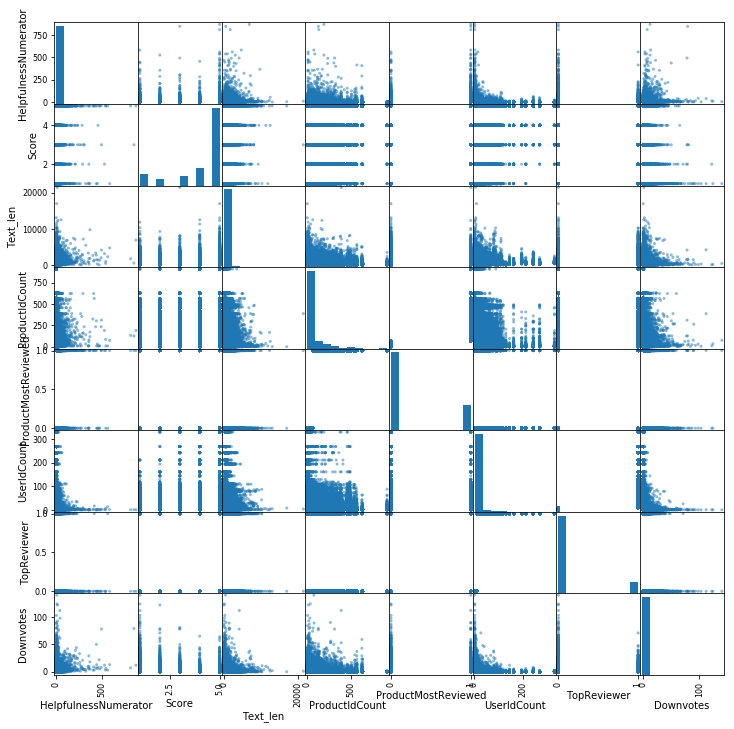

In [62]:
# Look for linear relationships
pd.plotting.scatter_matrix(data_for_corr, 
                           figsize=(12,12));

There are several important insights to be gained here:
- `HelpfulnessNumerator` is not strongly correlated with any of the other variables. 
- The only strong correlations are between variables that are calculated from one another (e.g., `UserIdCount` and `TopReviewer`.
- Because `HelpfulnessNumerator` is not strongly correlated with `Score` or `Text_len`, I can infer that "helpful" reviews can be of any length and of any degree of positivity/negativity.
- The corpus of reviews skews positive in sentiment; a rating of 5/5 is by far the most common score.

Given these outcomes, it seems that we must turn to the texts of the reviews themselves to try to predict helpfulness; other variables just won't do the job.

### View the most and least "helpful" reviews

I think it's worthwhile to do some qualitative analysis of the most and least "helpful" reviews. This may help me make better decisions when it comes time to engineer features on the texts themselves (e.g., tokenization, n-grams).

In [59]:
# View the most "helpful" review
pd.options.display.max_colwidth = 100
data[data.HelpfulnessNumerator == max(data.HelpfulnessNumerator)]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_len,ProductIdCount,ProductMostReviewed,UserIdCount,TopReviewer,Downvotes
190733,190734,B000FI4O90,A1GQGYROVZVW49,P. Schmidt,866,878,5,1164672000,Works as Advertised - Classy Product,see update at end of review<br /><br />******************<br /><br />I was lamenting about only ...,6918,190,1,1,0,12


In [49]:
# View the full text of this review 
pd.options.display.max_colwidth = 7000
data[data.HelpfulnessNumerator == max(data.HelpfulnessNumerator)]['Text']

190733    see update at end of review<br /><br />******************<br /><br />I was lamenting about only having frech lettuce, herbs, chives, and tomatoes from may garden during the long fall-winter-spring parts of the year. The refrigerated stuff from the grocery store goes bad right away and does not taste as good as the fresh stuff from the garden, either.<br /><br />Then I saw a Time Magazine page on the new AeroGrow AeroGarden, and I just had to try it out. After reading the AeroGrow website before making the purchase, I realized that buying one garden would not work for me, as the tomatoes cannot be grown in the same garden as lettuce & herbs. This is partially due to the large amount of room taken up by the tomatoes, and also because the lamp/watering cycle is different and finally because the nutrients are different.<br /><br />So, I bought two gardens, along with the Salad Greens seed kit and Cherry Tomato seed kit. Each garden comes with a mixed herb kit, so I figured to mix

Here are my initial observations on this review:
- The review received 866 upvotes and 12 downvotes on its helpfulness.
- It has a narrative arc starting with a problem, leading to the discovery of the product, and then the process of using the product to solve the problem.
- It contains lots of details about the product itself, including how it works, what parts it contains, what supplementary parts the user had to purchase, etc.
- The reviewer contributed only this one review to the dataset.
- The product itself was in the top 1% most reviewed products.

Let's do the same for the review with the most downvotes.

In [60]:
# View review with most downvotes
pd.options.display.max_colwidth = 100
data[data.Downvotes == max(data.Downvotes)]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_len,ProductIdCount,ProductMostReviewed,UserIdCount,TopReviewer,Downvotes
470626,470627,B001LUM1ZU,A1H6VW0W3UIK0K,"Tyler Durden ""The first rule of amazon.com is...",5,145,1,1243555200,Should be illegal...,As if mayonnaise wasn't unhealthy enough for you they have to add bacon to it now! And we wonde...,495,76,1,1,0,140


In [61]:
# View the full text of this review 
pd.options.display.max_colwidth = 500
data[data.Downvotes == max(data.Downvotes)]['Text']

470626    As if mayonnaise wasn't unhealthy enough for you they have to add bacon to it now!  And we wonder why the heart disease rate is so high in our country.  In fact, more americans DIE every year from Salmonela poisoning than from swine flu, lightning strikes and roadside bombs combined!  Look it up!  I can't wait to be President so we can outlaw mayonnaise and put the criminals who make it behind bars where they belong and in this instance, THE DEATH PENALTY for wasting perfectly good bacon!!!
Name: Text, dtype: object

Some observations on this review:
- The review received 5 upvotes and 140 downvotes on helpfulness.
- The reviewer's profile name contains references to <i>Fight Club</i>, which matches the cynical tone of the review.
- It lacks the problem-product-solution arc of the most helpful review; instead, it has a harsh tone throughout and climaxes with a call for capital punishment for the product's makers.
- The product is among the top 1% most reviewed products.
- The reviewer contributed only this one review to the dataset.

Keep in mind that readers don't have to vote on the helpfulness of a review at all; they can simply read it and move on. These two reviews represent extreme cases where readers were motivated to vote up or down on helpfulness instead of just scrolling past. 

### Meet the top reviewers

#### The most prolific reviewer

In [68]:
# Identify the reviewer who wrote the most reviews
pd.options.display.max_colwidth = 100
gary = data[data.UserIdCount == max(data.UserIdCount)]
gary.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_len,ProductIdCount,ProductMostReviewed,UserIdCount,TopReviewer,Downvotes
109,110,B001REEG6C,AY12DBB0U420B,Gary Peterson,0,0,5,1316390400,My Idea of a Good Diet Food.,I'm presently on a diet and I was at my Fresh and Easy Neighborhood Grocery looking over possibl...,741,3,0,329,1,0
2196,2197,B008YAXFWI,AY12DBB0U420B,Gary Peterson,0,0,4,1346630400,"Mild Taste, But Delicious.",A nearby Fresh and Easy Neighborhood Market stocks a number of gourmet imported products and I e...,461,1,0,329,1,0
3016,3017,B0025UALB6,AY12DBB0U420B,Gary Peterson,0,0,4,1316736000,Good Nutrition and Right Size.,"When I'm working, I always carry my own lunch. It's so much better than the food court, and I ha...",1026,5,0,329,1,0
3528,3529,B005TY2REE,AY12DBB0U420B,Gary Peterson,0,0,4,1333756800,No cholesterol. No Sodium. Not Very Sweet. Good Taste.,In my trip through the health area of my local food market I stumbled upon Enjoy Life Boom Choco...,540,1,0,329,1,0
3826,3827,B000X2CWTM,AY12DBB0U420B,Gary Peterson,1,1,5,1263340800,Mmmmmmmm!,I've always liked licorice candy and the best licorice I've ever had was obtained at Ikea. It wa...,552,37,0,329,1,0


In [73]:
# View summary stats
gary.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text_len,ProductIdCount,ProductMostReviewed,UserIdCount,TopReviewer,Downvotes
count,329.000000,329.000000,329.000000,329.000000,3.290000e+02,329.000000,329.000000,329.000000,329.0,329.0,329.000000
mean,270291.358663,1.124620,1.234043,4.659574,1.321395e+09,820.571429,16.410334,0.039514,329.0,1.0,0.109422
std,170106.232415,2.728514,2.968831,0.657676,3.073342e+07,298.758848,50.576783,0.195110,0.0,0.0,0.390672
min,110.000000,0.000000,0.000000,2.000000,1.226880e+09,385.000000,1.000000,0.000000,329.0,1.0,0.000000
25%,99740.000000,0.000000,0.000000,4.000000,1.316822e+09,618.000000,1.000000,0.000000,329.0,1.0,0.000000
50%,271766.000000,0.000000,0.000000,5.000000,1.333757e+09,746.000000,3.000000,0.000000,329.0,1.0,0.000000
75%,409657.000000,1.000000,1.000000,5.000000,1.341187e+09,939.000000,13.000000,0.000000,329.0,1.0,0.000000
max,566680.000000,20.000000,22.000000,5.000000,1.350950e+09,2516.000000,456.000000,1.000000,329.0,1.0,2.000000


In [72]:
# View just the review texts
pd.options.display.max_colwidth = 1000
for n in gary.index[:5]:
    print(gary.loc[n, 'Text'])
    print('\n')

I'm presently on a diet and I was at my Fresh and Easy Neighborhood Grocery looking over possible diet foods. I wanted things that were tasty, non-fat and low in calories. I came home with about a dozen items. That's how I discovered the Tillen Farms Pickled Crispy Asparagus. Well, I've always liked asparagus anyway and I've enjoyed several brands of pickled asparagus. This Tillen Farms brand is really, really good! It's the best I can recall. There's an excellent flavor and a big clove of garlic down in  the bottom of the jar which I'm looking forward to eating. I can't believe how good this asparagus tastes and right on the front it says "only 60 calories per jar!" Now this is my idea of a good diet food!<br /><br />Gary Peterson


A nearby Fresh and Easy Neighborhood Market stocks a number of gourmet imported products and I enjoy trying them. One is a variety of Baxters soups from Canada. Today, I had the Butternut Squash and Red Pepper Soup. Quite good. Smooth and mellow. Mild tast

The most prolific reviewer in the dataset is "Gary Peterson," who contributed 329 reviews. As the sample above shows, his reviews are generally positive, very focused on health/nutritional concerns, and structured with a narrative arc from problem to product to solution. 

I'm surprised to see that "Gary Peterson" frequently describes purchasing the reviewed product at a local store, not on Amazon. There could be many other reviewers who left reviews on Amazon for products purchased elsewhere, but I don't have a convenient way to distinguish them in the dataset.

Now I'll do another calculated column to identify the reviewer who received the most helpful votes overall (i.e., the sum of the `HelpfulnessNumerator` field after grouping by `UserId`.

#### The most "helpful" reviewer

In [74]:
# Calculate each reviewer's total number of "helpful" votes
user_help_votes = data.groupby('UserId')['HelpfulnessNumerator'].sum()
data['UserHelpVotes'] = [user_help_votes[index] for index in data['UserId']]

In [76]:
# Identify the reviewer who received the most "helpful" votes
pd.options.display.max_colwidth = 100
data[data.UserHelpVotes == max(data.UserHelpVotes)]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_len,ProductIdCount,ProductMostReviewed,UserIdCount,TopReviewer,Downvotes,UserHelpVotes
190733,190734,B000FI4O90,A1GQGYROVZVW49,P. Schmidt,866,878,5,1164672000,Works as Advertised - Classy Product,see update at end of review<br /><br />******************<br /><br />I was lamenting about only ...,6918,190,1,1,0,12,866


The most "helpful" reviewer is "P. Schmidt," author of the top-rated review of the Aerogarden above. Although it was his only review in the dataset, it scored him more "helpful" votes than any of the other reviewers scored across their reviews combined.

#### The most frequently reviewed product

Finally, let's examine the most frequently reviewed product to see what we can learn from its reviews.

In [86]:
# View the reviews of the most-reviewed product
cookies = data[data.ProductIdCount == max(data.ProductIdCount)]
cookies.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_len,ProductIdCount,ProductMostReviewed,UserIdCount,TopReviewer,Downvotes,UserHelpVotes
562970,562971,B007JFMH8M,A368Z46FIKHSEZ,"jaimoi ""Appreciator of good music""",0,0,5,1343433600,Delicious!,I love these cookies! Not only are they healthy but they taste great and are so soft! I will d...,135,909,1,1,0,0,0
562971,562972,B007JFMH8M,A1JAPP1CXRG57A,"Linda Painchaud-Steinman ""PARK EDGE BOOKS""",0,0,5,1343433600,Great Anytime of Day!,"Quaker Soft Baked Oatmeal Cookies with raisins are a delicious treat, great for anytime of day. ...",1316,909,1,24,1,0,20
562972,562973,B007JFMH8M,A2Z9JNXPIEL2B9,carwash169,0,0,5,1343433600,Very good!,"I am usually not a huge fan of oatmeal cookies, but these literally melt in your mouth. They are...",261,909,1,1,0,0,0
562973,562974,B007JFMH8M,A31CYJQO3FL586,"P. Titus ""Knitgirlll""",0,0,5,1343433600,Quaker Oats Oatmeal Raisin Mom Voxbox Review Courtesy of Influenster,"I participated in a product review that included a sample of <a href=""http://www.amazon.com/gp/p...",530,909,1,1,0,0,0
562974,562975,B007JFMH8M,A2KXQ2EKFF3K2G,Jessica,0,0,5,1343433600,"Quick, simple HEALTHY snack for the kiddos!!!",My kids loved these. I was very pleased to give my kids a quick on the go healthy snack before s...,169,909,1,1,0,0,0


The Quaker Soft-Baked Oatmeal Cookie is the most-reviewed product, with over 900 reviews in the dataset. Let's check the summary stats:

In [87]:
# View summary stats
cookies.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text_len,ProductIdCount,ProductMostReviewed,UserIdCount,TopReviewer,Downvotes,UserHelpVotes
count,909.000000,909.000000,909.000000,909.000000,9.090000e+02,909.000000,909.0,909.0,909.000000,909.000000,909.000000,909.000000
mean,563427.156216,0.045105,0.050605,4.580858,1.342416e+09,285.096810,909.0,1.0,2.720572,0.067107,0.005501,2.097910
std,263.753046,0.295246,0.317743,0.706567,1.021681e+06,247.596525,0.0,0.0,6.761760,0.250344,0.087630,14.106513
min,562971.000000,0.000000,0.000000,1.000000,1.341792e+09,87.000000,909.0,1.0,1.000000,0.000000,0.000000,0.000000
25%,563199.000000,0.000000,0.000000,4.000000,1.341878e+09,146.000000,909.0,1.0,1.000000,0.000000,0.000000,0.000000
50%,563428.000000,0.000000,0.000000,5.000000,1.341965e+09,205.000000,909.0,1.0,1.000000,0.000000,0.000000,0.000000
75%,563655.000000,0.000000,0.000000,5.000000,1.342742e+09,325.000000,909.0,1.0,1.000000,0.000000,0.000000,0.000000
max,563883.000000,5.000000,5.000000,5.000000,1.351123e+09,3535.000000,909.0,1.0,88.000000,1.000000,2.000000,319.000000


Scores skew positive, as is typical for this dataset, and reviews are a bit shorter than average (285 v. 433 characters). 

Let's read some of the reviews: 

In [88]:
# View the review texts
for n in cookies.index[:15]:
    print(cookies.loc[n, 'Text'])
    print('\n')

I love these cookies!  Not only are they healthy but they taste great and are so soft!  I will definitely add these to my grocery list!


Quaker Soft Baked Oatmeal Cookies with raisins are a delicious treat, great for anytime of day.  For example:<br /><br />--at breakfast, I had one with a large banana and a cup of coffee, and felt I'd had a relatively "healthy" start to the day.<br /><br />--the next day at lunch, following a tuna sandwich, I had one with a glass of milk, and was satisfied enough to not need a snack before dinner at 6:30.<br /><br />--the following night, after dinner, I had one with the remainder of my glass of wine. (Delicious!) And again, didn't feel the need to snack later in the evening.<br /><br />Each cookie is individually packaged, and their texture is soft and moist, with just the right amount of sweetness. Natural flavors used in the making are Cinnamon and All Spice.  These flavorings give the cookies a real old-fashioned, homemade taste.<br /><br />Nutri

A number of reviews of this product were related to promotions offered by other companies (not Amazon alone). Apparently, some reviewers were offered free samples in exchange for a review. Since reviews in exchange for products may be biased, let's take a closer look at the "helpful" cookie reviews.

In [95]:
# View "helpful" reviews of the cookies
pd.options.display.max_colwidth = 1000
cookies[cookies.HelpfulnessNumerator > 0]['Text'].head()

563070                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Ok so I love oatmeal cookies they are amazing. And this is one that I approve on for its soft gooey and chewy. It is absolutely amazing. I love it, and would recommend it to anyone that loves oatmeal, and the raisins are sweet they do not taste tart and are not overpowering.
563071    I love oatmeal raisin cookies, really love them.  So, I am always on the lookout for a good cookie...especially if they

In [97]:
# Compare "unhelpful" reviews
pd.options.display.max_colwidth = 2000
cookies[cookies.HelpfulnessNumerator == 0]['Text'].head()

562970                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

Comparing the "helpful" and "unhelpful" reviews, it's hard to perceive any pattern. In each group there are reviews that reference receiving the product as a free sample, describe the nutritional content and packaging, and offer both positive and negative assessments of taste and texture. If it is possible to distinguish helpful and unhelpful reviews, the pattern is a pretty complicated one, and we'll need machine learning to figure it out.

### Save a copy of the data for modeling

This concludes my exploration of all the features other than the review texts and the `HelpfulnessNumerator`. I'll check for any missing values in those fields and then save a copy of the data with every other feature removed for use in the next section.

In [64]:
# Check for missing `Text` values
data.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               11
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                    3
Text                       0
Text_len                   0
ProductIdCount             0
ProductMostReviewed        0
UserIdCount                0
TopReviewer                0
Downvotes                  0
dtype: int64

In [0]:
# Make a copy of the dataset with just the feature and target
data_clean = data[['HelpfulnessNumerator', 'Text']]
data_clean.columns = ['helpful', 'text']
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393579 entries, 0 to 568453
Data columns (total 2 columns):
helpful    393579 non-null int64
text       393579 non-null object
dtypes: int64(1), object(1)
memory usage: 19.0+ MB


In [0]:
data_clean.to_csv('data_clean.csv')

# Advanced exploration/preprocessing

Things to try:
- remove stopwords
- lemmatize
- frequency distributions on most upvoted reviews to see what are the most used words
- bigrams or other n-grams and their mutual information scores

## Trying everything once with a single review text

In [0]:
sample = data_clean.loc[10, 'text']
sample

"I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!"

In [2]:
# Set up stopwords to be removed
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

stop_list = stopwords.words('english')
stop_list += list(string.punctuation)
stop_list += ['br', '.<', '..', '...', '``', "''", '--']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
# Set up baseline tokenizer
from nltk import word_tokenize

tokens = word_tokenize(sample)
clean_tokens = [word.lower() for word in tokens if word.lower() not in stop_list]
clean_tokens

["n't",
 'know',
 "'s",
 'cactus',
 'tequila',
 'unique',
 'combination',
 'ingredients',
 'flavour',
 'hot',
 'sauce',
 'makes',
 'one',
 'kind',
 'picked',
 'bottle',
 'trip',
 'brought',
 'back',
 'home',
 'us',
 'totally',
 'blown',
 'away',
 'realized',
 'simply',
 'could',
 "n't",
 'find',
 'anywhere',
 'city',
 'bummed.',
 'magic',
 'internet',
 'case',
 'sauce',
 'ecstatic',
 'it.',
 'love',
 'hot',
 'sauce..i',
 'mean',
 'really',
 'love',
 'hot',
 'sauce',
 "n't",
 'want',
 'sauce',
 'tastelessly',
 'burns',
 'throat',
 'grab',
 'bottle',
 'tequila',
 'picante',
 'gourmet',
 'de',
 'inclan',
 'realize',
 'taste',
 'never',
 'want',
 'use',
 'sauce.',
 'thank',
 'personal',
 'incredible',
 'service']

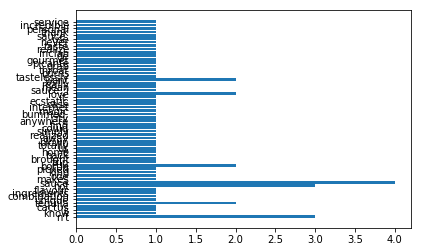

In [0]:
# Set up FreqDist()
from nltk import FreqDist

freqdist = FreqDist(clean_tokens)
plt.barh(y=[key for key in freqdist.keys()], width=[val for val in freqdist.values()]);

In [0]:
# Set up lemmatizer
from nltk.stem.wordnet import WordNetLemmatizer

lem = WordNetLemmatizer()
lemmata = []
for word in clean_tokens:
    lemmata.append(lem.lemmatize(word))
lemmata

["n't",
 'know',
 "'s",
 'cactus',
 'tequila',
 'unique',
 'combination',
 'ingredient',
 'flavour',
 'hot',
 'sauce',
 'make',
 'one',
 'kind',
 'picked',
 'bottle',
 'trip',
 'brought',
 'back',
 'home',
 'u',
 'totally',
 'blown',
 'away',
 'realized',
 'simply',
 'could',
 "n't",
 'find',
 'anywhere',
 'city',
 'bummed.',
 'magic',
 'internet',
 'case',
 'sauce',
 'ecstatic',
 'it.',
 'love',
 'hot',
 'sauce..i',
 'mean',
 'really',
 'love',
 'hot',
 'sauce',
 "n't",
 'want',
 'sauce',
 'tastelessly',
 'burn',
 'throat',
 'grab',
 'bottle',
 'tequila',
 'picante',
 'gourmet',
 'de',
 'inclan',
 'realize',
 'taste',
 'never',
 'want',
 'use',
 'sauce.',
 'thank',
 'personal',
 'incredible',
 'service']

## Try it all again with every "helpful" review combined

In [0]:
# Get all helpful reviews
helpful = data_clean[data_clean.helpful > 0]
combined_text = ''
for row in helpful.index:
    combined_text += helpful.loc[row, 'text']

len(combined_text)

91666026

In [0]:
# Get number of reviews
len(helpful)

186453

In [0]:
# Tokenize
tokens = word_tokenize(combined_text)

In [0]:
# Get total number of tokens
len(tokens)

150

In [0]:
# Convert all tokens to lowercase
lower_tokens = [word.lower() for word in tokens if word.lower() not in stop_list]

In [0]:
# Lemmatize
lemma_tokens = [lem.lemmatize(word) for word in lower_tokens]

In [0]:
# Get frequency distribution
freqdist = FreqDist(lemma_tokens)

In [0]:
# Get number of unique tokens
len(freqdist)

201856

In [0]:
# Select top 50 words
top_50 = freqdist.most_common(50)

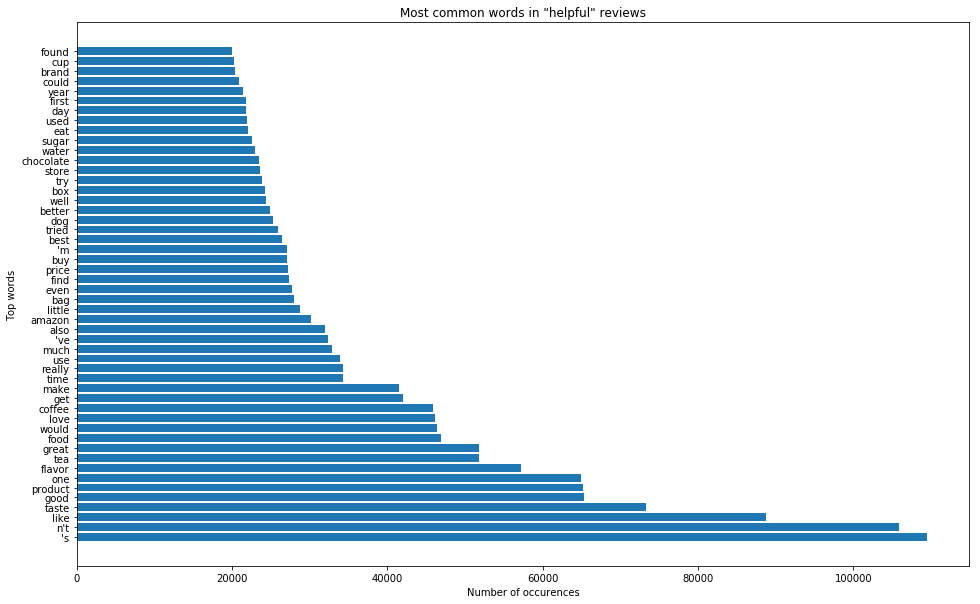

In [0]:
# Plot top 50 words
plt.figure(figsize=(16,10))
plt.barh(y=[x[0] for x in top_50], width=[x[1] for x in top_50])
plt.xlabel('Number of occurences')
plt.ylabel('Top words')
plt.title('Most common words in "helpful" reviews')
plt.show();

In [0]:
# Get top 100 words
top_100 = freqdist.most_common(100)

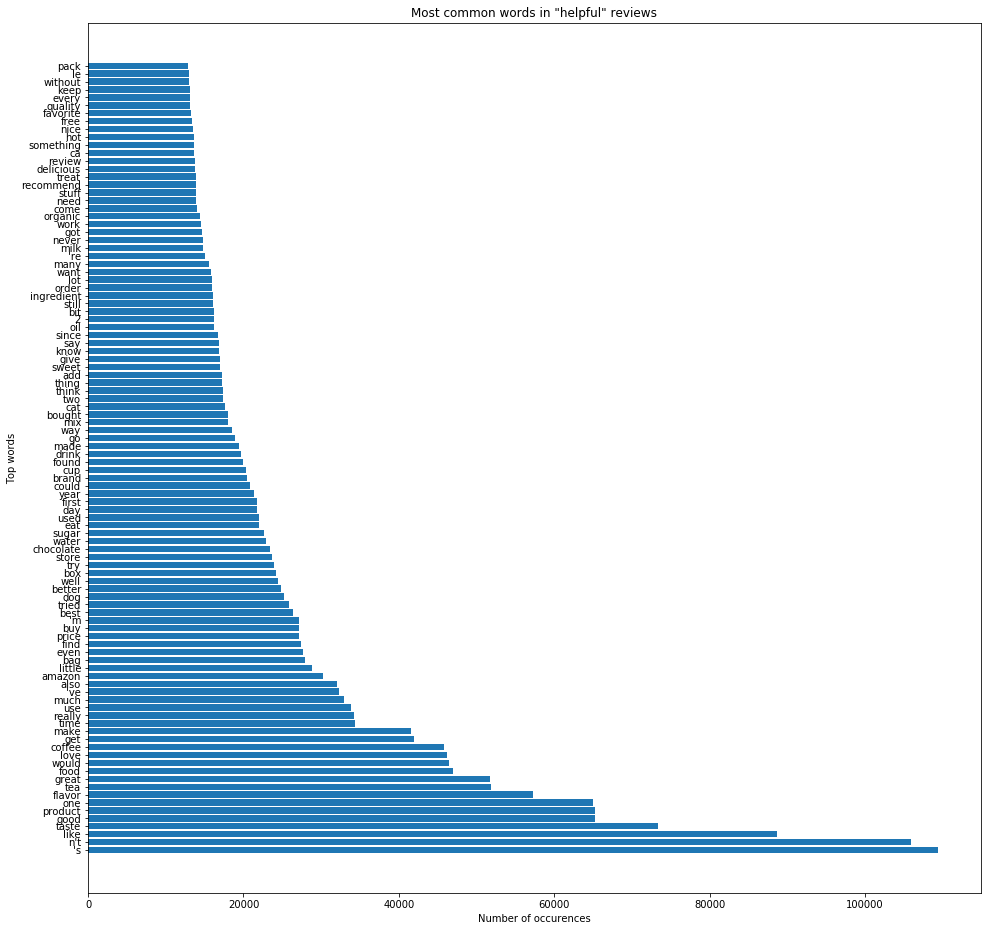

In [0]:
# Plot top 100 words
plt.figure(figsize=(16,16))
plt.barh(y=[x[0] for x in top_100], width=[x[1] for x in top_100])
plt.xlabel('Number of occurences')
plt.ylabel('Top words')
plt.title('Most common words in "helpful" reviews')
plt.show();

### Look at bigrams

In [0]:
# Do bigrams
import nltk
bigram_measures = nltk.collocations.BigramAssocMeasures()

finder = nltk.collocations.BigramCollocationFinder.from_words(lemma_tokens)

scored = finder.score_ngrams(bigram_measures.raw_freq)

scored[:50]

[(('ca', "n't"), 0.00152568357473086),
 (('taste', 'like'), 0.001025859242584942),
 (('wo', "n't"), 0.0007550925729135553),
 (('grocery', 'store'), 0.0007136114837888143),
 (('href=', 'http'), 0.0006616461633468311),
 (('green', 'tea'), 0.0005728720742584429),
 (("'ve", 'tried'), 0.000554752587525383),
 (('highly', 'recommend'), 0.0005403937489822033),
 (('peanut', 'butter'), 0.0005251232381505679),
 (('could', "n't"), 0.000507117710453565),
 (('taste', 'good'), 0.0004998243321459181),
 (("n't", 'like'), 0.0004817048454128582),
 (('taste', 'great'), 0.00047703252493452197),
 (("n't", 'know'), 0.0004758929345739522),
 (('much', 'better'), 0.00047008102373504617),
 (('dog', 'food'), 0.0004442123225501115),
 (('gluten', 'free'), 0.0004381724936390915),
 (('would', "n't"), 0.0004368049852064077),
 (("n't", 'get'), 0.0003870048864495071),
 (('really', 'good'), 0.00034438420696419626),
 (('olive', 'oil'), 0.0003440423298560253),
 (('year', 'old'), 0.00033583727925992266),
 (('really', 'like'

In [0]:
# Get mutual information scores
pmi_finder = nltk.collocations.BigramCollocationFinder.from_words(lemma_tokens)

pmi_finder.apply_freq_filter(5)

pmi_scored = pmi_finder.score_ngrams(bigram_measures.pmi)

pmi_scored[:50]

[(('vergnano', '1882'), 20.743053245793853),
 (('algernon', 'freeman-mitford'), 20.48001883996006),
 (('ping', 'pong'), 20.257626418623612),
 (('riso', 'bello'), 20.257626418623612),
 (('bbp', 'okc'), 20.25762641862361),
 (('dentie', 'toothpowder'), 20.25762641862361),
 (('dunaliella', 'salina'), 20.25762641862361),
 (('saf®', 'bakipan®'), 20.25762641862361),
 (('vialone', 'nano'), 20.216984434126264),
 (('192f', '204'), 20.064981340681214),
 (('cucina', 'antica'), 20.064981340681214),
 (('j.j.', 'gottenbos'), 20.064981340681214),
 (('nagasaki', 'jjamppong'), 20.064981340681214),
 (('r.k.', 'downey'), 20.064981340681214),
 (('r.o', 'vles'), 20.064981340681214),
 (('robblen', 'r.k.'), 20.064981340681214),
 (('vles', 'j.j.'), 20.064981340681214),
 (('y.', 'golovko'), 20.064981340681214),
 (('fischer', 'wieser'), 20.06498134068121),
 (('star®', 'saf®'), 20.06498134068121),
 (('lymph', 'node'), 20.035233997287165),
 (('insightful', 'inspirational'), 19.994592012789816),
 (('//www.amazon.co

### Look at trigrams

In [0]:
# View top trigrams by raw frequency
trigram_measures = nltk.collocations.TrigramAssocMeasures()

tri_finder = nltk.collocations.TrigramCollocationFinder.from_words(lemma_tokens)

tri_scored = tri_finder.score_ngrams(trigram_measures.raw_freq)

tri_scored[:50]

[(('local', 'grocery', 'store'), 0.00016672206975136303),
 (('ca', "n't", 'find'), 0.00011407299509303787),
 (('health', 'food', 'store'), 0.00010461439510030845),
 (('ca', "n't", 'get'), 0.00010438647702819449),
 (("'s", 'red', 'mill'), 9.469995896335112e-05),
 (('could', "n't", 'find'), 9.196494209798357e-05),
 (('bob', "'s", 'red'), 9.093931077347075e-05),
 (('ca', "n't", 'wait'), 9.059743366529981e-05),
 (('high', 'fructose', 'corn'), 8.854617101627414e-05),
 (('ca', "n't", 'beat'), 8.809033487204622e-05),
 (('fructose', 'corn', 'syrup'), 8.444364571822283e-05),
 (("n't", 'taste', 'like'), 7.45292095812655e-05),
 (('ca', "n't", 'say'), 7.247794693223985e-05),
 (('would', 'highly', 'recommend'), 7.099647946349909e-05),
 (('go', 'long', 'way'), 7.008480717504325e-05),
 (('/a', 'href=', 'http'), 6.928709392264438e-05),
 (('trader', 'joe', "'s"), 6.86033397063025e-05),
 (('pack', '6', '/a'), 6.495665055247911e-05),
 (('ca', "n't", 'go'), 6.484269151642213e-05),
 (('pack', '12', '/a'), 

In [0]:
# View top trigrams by mutual information score
tri_pmi_finder = nltk.collocations.TrigramCollocationFinder.from_words(lemma_tokens)

tri_pmi_finder.apply_freq_filter(5)

tri_pmi_scored = tri_pmi_finder.score_ngrams(trigram_measures.pmi)

tri_pmi_scored[:50]

[(('tovolo', 'teeli', 'frieling/swissgold'), 40.37507517919895),
 (('star®', 'saf®', 'bakipan®'), 40.322607759304816),
 (('r.o', 'vles', 'j.j.'), 40.12996268136243),
 (('robblen', 'r.k.', 'downey'), 40.12996268136243),
 (('vles', 'j.j.', 'gottenbos'), 40.12996268136243),
 (('readable', 'insightful', 'inspirational'), 40.05957335347102),
 (('//www.amazon.com/gp/product/b0012s1v2a', 'oster', '5965'),
  39.73764525858367),
 (('mikhail', 'y.', 'golovko'), 39.67053106272513),
 (('5965', 'stainless-steel', '1-1/2-liter'), 39.28196577480747),
 (('h.m.s', 'peregrine', 'cavendish'), 38.466048839246454),
 (('oster', '5965', 'stainless-steel'), 38.05957335347102),
 (('sir', 'algernon', 'freeman-mitford'), 38.0531470843116),
 (('y.', 'golovko', 'eric'), 37.96003767992011),
 (('dunaliella', 'salina', 'algae'), 37.930290336526056),
 (('downey', 'a.', 'ashri'), 37.70369792666033),
 (('r.k.', 'downey', 'a.'), 37.70369792666033),
 (('nutr', '1982', 'apr'), 37.67463546105787),
 (('192f', '204', 'f.'), 3

## Advanced EDA takeaways

Takeaways from frequency distributions:
- The most common words represent a mix of positive and negative feelings toward products and situations. One the one hand, reviewers talk about "liking" or "loving" products, but they also talk about things they "can't," "won't," or "don't" do. 
- Tea, coffee, and chocolate stand out as top products; sugar, oil, and milk are frequently mentioned ingredients.
- Cat and dog feature heavily because the dataset includes reviews of pet foods as well as gourmet products.
- Comments on the packaging appear to be common (bag, box, and pack appear in the top 100).
- There may be a frequent contrast between Amazon and local stores.

Takeaways from bigrams:

- The most frequently occurring bigram is "can't"; there seems to be an emphasis in reviews on something the writer can't get or do, and maybe the product is solving that (or exacerbating the problem).
- Green tea, peanut butter, olive oil, coconut oil, dark chocolate, and tea bags are frequently mentioned foods.
- There are lots of positive comparisons in the bigrams: tastes good, tastes great, much better.
- Although there is no correlation between positivity and helpfulness of a review, "highly recommend," "would recommend," and "5 star" occur frequently.
- The bigrams highlight gluten allergy/sensitivity as a major concern of reviewers.

Takeaways from trigrams:

Trigrams highlight key phrases that aren't as apparent when looking at frequency distributions or bigrams. 

- Trigrams show an emphasis on pain points that the product/Amazon may have solved. Phrases like "can't/couldn't get," "can't/couldn't find," "can't/won't eat" occur relatively frequently.
- Trigrams also highlight discussion of local stores and "Amazon's price."
- Bob's Red Mill and Trader Joe's are frequently named in reviews.
- High fructose corn syrup is the only ingredient that appears at the trigram level.
- Trigrams highlight taste comparisons as a common feature of reviews.

Mutual information scores do not seem very helpful at either the bigram or trigram level. At best they highlight a few additional brand names. At worst they pick up on phrases that look spammy. 

## Try looking at the unhelpful reviews to see if they're very different

In [0]:
# Get all unhelpful reviews
unhelpful = data_clean[data_clean.helpful == 0]
combined_text_unhelpful = ''
for row in unhelpful.index:
    combined_text_unhelpful += unhelpful.loc[row, 'text']

len(combined_text_unhelpful)

79080028

In [0]:
# Get number of reviews
len(unhelpful)

207126

In [0]:
# Tokenize
tokens_unhelpful = word_tokenize(combined_text_unhelpful)

In [0]:
# Get total number of tokens
len(tokens_unhelpful)

17132378

In [0]:
# Convert all tokens to lowercase
lower_tokens_unhelpful = [word.lower() for word in tokens_unhelpful if word.lower() not in stop_list]

In [0]:
# Lemmatize
lemma_tokens_unhelpful = [lem.lemmatize(word) for word in lower_tokens_unhelpful]

In [0]:
# Get frequency distribution
freqdist_unhelpful = FreqDist(lemma_tokens_unhelpful)

In [0]:
# Get number of unique tokens
len(freqdist_unhelpful)

183037

In [0]:
# Select top 50 words
top_50_unhelpful = freqdist_unhelpful.most_common(50)

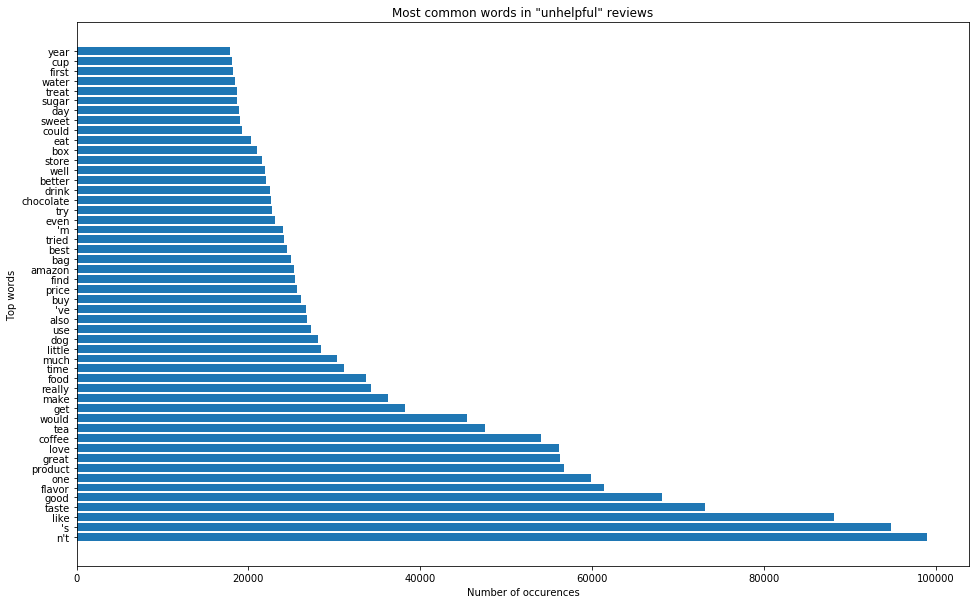

In [0]:
# Plot top 50 words
plt.figure(figsize=(16,10))
plt.barh(y=[x[0] for x in top_50_unhelpful], 
         width=[x[1] for x in top_50_unhelpful])
plt.xlabel('Number of occurences')
plt.ylabel('Top words')
plt.title('Most common words in "unhelpful" reviews')
plt.show();

In [0]:
# Get top 100 words
top_100_unhelpful = freqdist_unhelpful.most_common(100)

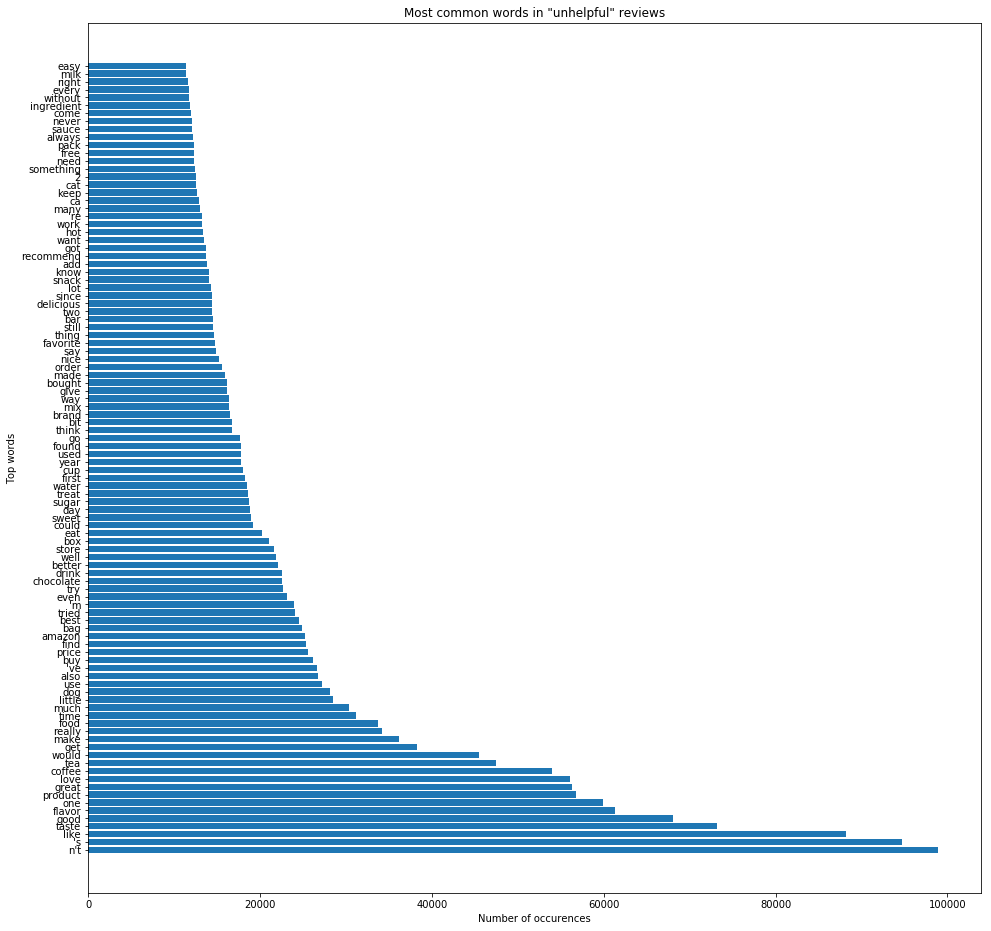

In [0]:
# Plot top 100 words
plt.figure(figsize=(16,16))
plt.barh(y=[x[0] for x in top_100_unhelpful], 
         width=[x[1] for x in top_100_unhelpful])
plt.xlabel('Number of occurences')
plt.ylabel('Top words')
plt.title('Most common words in "unhelpful" reviews')
plt.show();

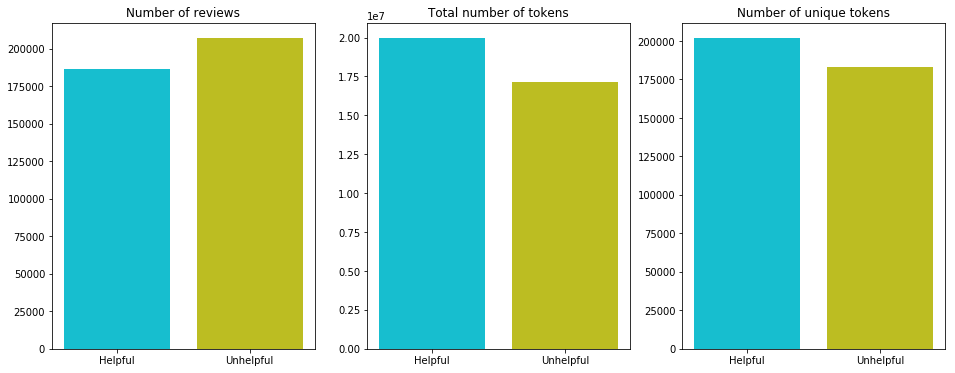

In [0]:
# Compare helpful and unhelpful review data subsets
fig, axes = plt.subplots(1, 3, figsize=(16,6))

ax1 = axes[0]
ax1.bar(x=['Helpful', 'Unhelpful'], height=[len(helpful), len(unhelpful)], 
        color=['tab:cyan', 'tab:olive'])
ax1.set_title('Number of reviews')

ax2 = axes[1]
ax2.bar(x=['Helpful', 'Unhelpful'], height=[len(tokens), len(tokens_unhelpful)],
        color=['tab:cyan', 'tab:olive'])
ax2.set_title('Total number of tokens')

ax3 = axes[2]
ax3.bar(x=['Helpful', 'Unhelpful'], height=[len(freqdist), len(freqdist_unhelpful)],
        color=['tab:cyan', 'tab:olive'])
ax3.set_title('Number of unique tokens')

plt.show();

GUESS WHAT: The vocabularies of helpful and unhelpful reviews are VERY SIMILAR. This means we have a machine learning problem on our hands. I would not be able to distinguish a helpful from an unhelpful review by vocabulary alone. Let's see if a neural network can do it!

# Preprocessing and modeling

Things to try:
- word2vec (which requires tokenization, stopword removal first)
- glove or word2vec

Modeling things to try
Shallow models:
- Random forest
- Logistic regression
- SVM

Deep models:
- RNNs of various dimensions


In [3]:
# If needed, re-read in the clean dataset
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
data_clean = pd.read_csv("/content/drive/My Drive/helpful-reviews/data_clean.csv")
data_clean.drop('Unnamed: 0', axis=1, inplace=True)
data_clean['helpful_1'] = np.where(data_clean['helpful'] > 0, 1, 0)
data_clean.head()

,helpful,text,helpful_1
0,1,I have bought several of the Vitality canned d...,1
1,0,Product arrived labeled as Jumbo Salted Peanut...,0
2,1,This is a confection that has been around a fe...,1
3,3,If you are looking for the secret ingredient i...,1
4,0,Great taffy at a great price. There was a wid...,0


In [0]:
data_clean.helpful_1.value_counts(normalize=True)

0    0.526263
1    0.473737
Name: helpful_1, dtype: float64

In [0]:
# Train-val-test split
from sklearn.model_selection import train_test_split

y = data_clean['helpful_1']
X = data_clean['text']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5,
                                                random_state=123)

In [0]:
print(y_train.value_counts(normalize=True))
print(y_val.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.525673
1    0.474327
Name: helpful_1, dtype: float64
0    0.528787
1    0.471213
Name: helpful_1, dtype: float64
0    0.528457
1    0.471543
Name: helpful_1, dtype: float64


## Make bigrams, run through a Random Forest for baseline

In [0]:
# Fit a CountVectorizer-RandomForest pipeline (~2 min.)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipe_bigram_rf = Pipeline([('vectorizer', CountVectorizer(analyzer='word', 
                                                          ngram_range=(2, 2), 
                                                          stop_words=stop_list, 
                                                          max_features=100)),
                        ('forest', RandomForestClassifier(n_estimators=100,
                                                          n_jobs=-1))])

pipe_bigram_rf.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=100, min_df=1, ngram_range=(2, 2),
                                 preprocessor=None,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                  

In [0]:
# Predict and score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_train = pipe_bigram_rf.predict(X_train)
print('Training accuracy:', accuracy_score(y_pred_train, y_train))

Training accuracy: 0.5917748354046045


In [0]:
# Validate
y_pred_val = pipe_bigram_rf.predict(X_val)
print('Validation accuracy:', accuracy_score(y_pred_val, y_val))

Validation accuracy: 0.540779511154022


In [0]:
# View additional metrics
print(classification_report(y_pred_val, y_val))

              precision    recall  f1-score   support

           0       0.84      0.54      0.66     32248
           1       0.20      0.53      0.30      7110

    accuracy                           0.54     39358
   macro avg       0.52      0.54      0.48     39358
weighted avg       0.73      0.54      0.59     39358



## Make term-document matrix, run through a Random Forest for baseline

In [0]:
# Tokenize + lower case
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipe_tdm_rf = Pipeline([('vectorizer', CountVectorizer(stop_words=stop_list, 
                                                       max_features=100)),
                        ('forest', RandomForestClassifier(n_estimators=100,
                                                          n_jobs=-1))])

pipe_tdm_rf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=100, min_df=1, ngram_range=(1, 1),
                                 preprocessor=None,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                  

In [0]:
# Predict and score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_train = pipe_tdm_rf.predict(X_train)
print('Training accuracy:', accuracy_score(y_pred_train, y_train))
print(classification_report(y_pred_train, y_train))

Training accuracy: 0.9722958874177023
              precision    recall  f1-score   support

           0       0.98      0.96      0.97    169148
           1       0.96      0.98      0.97    145715

    accuracy                           0.97    314863
   macro avg       0.97      0.97      0.97    314863
weighted avg       0.97      0.97      0.97    314863



In [0]:
# Validate
y_pred_val = pipe_tdm_rf.predict(X_val)
print('Validation accuracy:', accuracy_score(y_pred_val, y_val))
print(classification_report(y_pred_val, y_val))

Validation accuracy: 0.5493165303114995
              precision    recall  f1-score   support

           0       0.62      0.57      0.59     22556
           1       0.47      0.52      0.50     16802

    accuracy                           0.55     39358
   macro avg       0.55      0.55      0.54     39358
weighted avg       0.56      0.55      0.55     39358



## Do TF-IDF, run through a Random Forest for baseline

In [0]:
# Build a pipeline for TF-IDF vectorization and classification (~11 min.)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipe_tfidf_rf = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stop_list, 
                                                         max_features=100)),
                          ('forest', RandomForestClassifier(n_estimators=100,
                                                            n_jobs=-1))])

pipe_tfidf_rf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=100,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves',...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impu

In [0]:
# Predict and score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_train = pipe_tfidf_rf.predict(X_train)
print('Training accuracy:', accuracy_score(y_pred_train, y_train))
print(classification_report(y_pred_train, y_train))

Training accuracy: 0.9719814649545993
              precision    recall  f1-score   support

           0       0.98      0.96      0.97    168755
           1       0.96      0.98      0.97    146108

    accuracy                           0.97    314863
   macro avg       0.97      0.97      0.97    314863
weighted avg       0.97      0.97      0.97    314863



In [0]:
# Validate
y_pred_val = pipe_tfidf_rf.predict(X_val)
print('Validation accuracy:', accuracy_score(y_pred_val, y_val))
print(classification_report(y_pred_val, y_val))

Validation accuracy: 0.5513491539204228
              precision    recall  f1-score   support

           0       0.65      0.57      0.60     23704
           1       0.45      0.53      0.48     15654

    accuracy                           0.55     39358
   macro avg       0.55      0.55      0.54     39358
weighted avg       0.57      0.55      0.56     39358



What I've learned from these models so far is that TDM and TF-IDF can both produce models with some predictive power, although they are both overfit. Bigrams didn't do so well. All three were tested with a max_features of 100 to keep running times low. Starting from TDM or TF-IDF, a Random Forest could be tuned or other classifiers could be tried in the hope of getting better results.

### Try to improve this RF through grid search

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer(stop_words=stop_list, max_features=100)
train_tfidf = tfidf_vec.fit_transform(X_train)

In [0]:
# Use GridSearchCV to find optimal number of estimators (~ 2 hrs.)
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
          'n_jobs': [-1]}
rf = RandomForestClassifier()


grid_tfidf_rf = GridSearchCV(rf, params, cv=3, n_jobs=-1)

grid_tfidf_rf.fit(train_tfidf, y_train)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [0]:
print('Best score:', grid_tfidf_rf.best_score_)
print('Best params:', grid_tfidf_rf.best_params_)

Best score: 0.5483654795895357
Best params: {'n_estimators': 100, 'n_jobs': -1}


The grid search settled on 100 estimators, but it's still performing badly. I'll try another grid search with greater numbers of estimators.

In [0]:
# Use GridSearchCV to find optimal number of estimators (~ 8 hrs.)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {'n_estimators': [100, 200, 500, 1000],
          'n_jobs': [-1]}
rf = RandomForestClassifier()


grid_tfidf_rf = GridSearchCV(rf, params, cv=3, n_jobs=-1)

grid_tfidf_rf.fit(train_tfidf, y_train)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [0]:
print('Best score:', grid_tfidf_rf.best_score_)
print('Best params:', grid_tfidf_rf.best_params_)

Best score: 0.5546031130999831
Best params: {'n_estimators': 1000, 'n_jobs': -1}


In [11]:
# Use GridSearchCV to find optimal number of estimators (~ 2 hrs.)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {'n_estimators': [100, 1000],
          'max_depth': [15, 20, 25],
          'n_jobs': [-1]}
rf = RandomForestClassifier()


grid_tfidf_rf = GridSearchCV(rf, params, cv=3, n_jobs=-1)

grid_tfidf_rf.fit(train_tfidf, y_train)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [12]:
print('Best score:', grid_tfidf_rf.best_score_)
print('Best params:', grid_tfidf_rf.best_params_)

Best score: 0.5672181234378126
Best params: {'max_depth': 25, 'n_estimators': 1000, 'n_jobs': -1}


In [0]:
# Try making bigger embeddings
tfidf_vec_bigger = TfidfVectorizer(stop_words=stop_list, max_features=200)
train_tfidf_bigger = tfidf_vec_bigger.fit_transform(X_train)

In [14]:
train_tfidf_bigger[:5]

<5x200 sparse matrix of type '<class 'numpy.float64'>'
	with 40 stored elements in Compressed Sparse Row format>

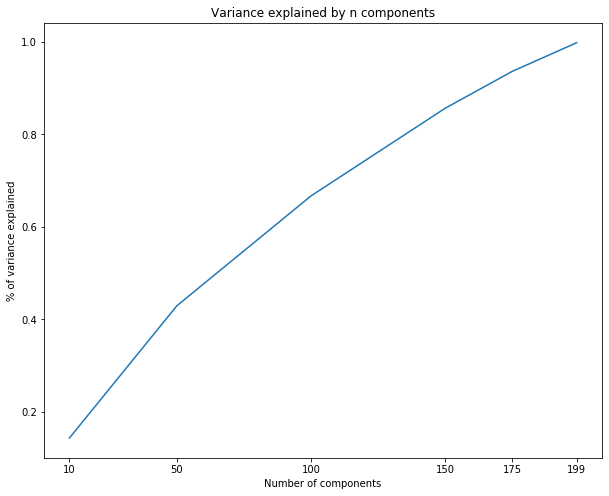

In [23]:
# Use TruncatedSVD (in place of PCA) to try to explain 
from sklearn.decomposition import TruncatedSVD
# svd = TruncatedSVD(n_components=150, n_iter=7, random_state=42)
# svd.fit(train_tfidf_bigger)

# print(svd.explained_variance_ratio_)

# print(svd.explained_variance_ratio_.sum())

# Try several numbers of components to explain 80% of variance
comps = [10, 50, 100, 150, 175, 199]
var_sums = []
for comp in comps:
    svd = TruncatedSVD(n_components=comp, n_iter=10, random_state=42)
    svd.fit(train_tfidf_bigger)
    var_sums.append(np.sum(svd.explained_variance_ratio_))
    
# Visualize results
plt.figure(figsize=(10,8))
plt.plot(comps, var_sums)
plt.xlabel('Number of components')
plt.ylabel('% of variance explained')
plt.title('Variance explained by n components')
plt.xticks([10, 50, 100, 150, 175, 199])
plt.show();


In [24]:
# Build and fit pipeline for Random Forest with 150 TF-IDF components (~ 40 min.)
from sklearn.pipeline import Pipeline
pipe_tfidf_svd_rf = Pipeline([
    ('tf_idf', TfidfVectorizer(stop_words=stop_list, max_features=200)),
    ('components', TruncatedSVD(n_components=150, n_iter=7, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=1000, max_depth=25, n_jobs=-1))])

pipe_tfidf_svd_rf.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('tf_idf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=200,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=25,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impur

In [25]:
# Predict and score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_train = pipe_tfidf_svd_rf.predict(X_train)
print('Training accuracy:', accuracy_score(y_pred_train, y_train))
print(classification_report(y_pred_train, y_train))

Training accuracy: 0.9948136173510383
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    166082
           1       0.99      1.00      0.99    148781

    accuracy                           0.99    314863
   macro avg       0.99      0.99      0.99    314863
weighted avg       0.99      0.99      0.99    314863



In [26]:
y_pred_val = pipe_tfidf_svd_rf.predict(X_val)
print('Training accuracy:', accuracy_score(y_pred_val, y_val))
print(classification_report(y_pred_val, y_val))

Training accuracy: 0.5734031200772397
              precision    recall  f1-score   support

           0       0.75      0.57      0.65     27076
           1       0.38      0.57      0.46     12282

    accuracy                           0.57     39358
   macro avg       0.56      0.57      0.55     39358
weighted avg       0.63      0.57      0.59     39358



## Try GloVe embeddings, RF for baseline

In [29]:
# Get total vocabulary
from keras.preprocessing.text import text_to_word_sequence

all_train_text = ''
for row in X_train.index:
    all_train_text += X_train[row]
total_vocab = text_to_word_sequence(all_train_text, 
                                    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', 
                                    lower=True, split=' ')
total_vocab = set(total_vocab)

Using TensorFlow backend.


In [0]:
# Get GloVe embeddings for words in total_vocab
glove = {}
with open('/content/drive/My Drive/helpful-reviews/glove.6B.50d.txt') as f:
    for line in f:
        parts = line.split()
        word = parts[0]
        if word in total_vocab:
            vector = np.array(parts[1:], dtype=np.float32)
            glove[word] = vector

In [31]:
glove['coffee']

array([-0.54015 , -0.29931 , -0.67591 ,  0.15784 ,  0.90241 , -0.89567 ,
       -1.1267  , -0.69013 ,  0.7116  ,  0.71231 ,  0.11031 , -0.37268 ,
        0.93846 , -0.42899 ,  1.0807  ,  0.43785 , -0.38785 ,  0.65528 ,
        0.34501 , -1.3793  ,  1.114   , -0.20227 ,  0.53612 ,  0.67394 ,
       -0.52717 , -0.30703 , -0.14833 ,  0.78579 ,  0.84364 ,  0.56468 ,
        2.1954  , -0.097544, -0.41744 ,  1.0296  ,  0.083024, -0.1552  ,
       -1.1257  ,  0.74416 ,  1.1534  ,  0.24415 ,  0.057113,  0.63826 ,
       -0.35989 , -0.031659,  0.88827 ,  0.78731 , -0.47028 , -0.69737 ,
        0.12029 , -0.41486 ], dtype=float32)

In [0]:
# Create gloVe vectorizer class
class GloVecto(object):
    def __init__(self, vec):
        self.vec = vec
        if len(vec) == 0:
            self.dimensions = 0
        else:
            self.dimensions = len(vec[next(iter(glove))])
    
    def fit(self, X, y):
        return self
    
    def transform(self, X):
        return np.array([np.mean([self.vec[w] for w in words if w in self.vec] 
                                 or [np.zeros(self.dimensions)], 
                                 axis=0) for words in X])

### Try baseline Random Forest with GloVe embeddings

In [0]:
# Try baseline Random Forest with GloVe embeddings (~ 5 min.)
# Move GloVecto class to separate file and import here
# from glovecto.py import *
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipe_glove_rf = Pipeline([('vectorizer', GloVecto(glove)),
                          ('forest', RandomForestClassifier(n_estimators=100,
                                                            n_jobs=-1))])
pipe_glove_rf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer', <__main__.GloVecto object at 0x7efb9bd15f98>),
                ('forest',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [0]:
# Predict and score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_train = pipe_glove_rf.predict(X_train)
print('Training accuracy:', accuracy_score(y_pred_train, y_train))
print(classification_report(y_pred_train, y_train))

Training accuracy: 0.9977196431463843
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166067
           1       1.00      1.00      1.00    148796

    accuracy                           1.00    314863
   macro avg       1.00      1.00      1.00    314863
weighted avg       1.00      1.00      1.00    314863



In [0]:
# Validate
y_pred_val = pipe_glove_rf.predict(X_val)
print('Validation accuracy:', accuracy_score(y_pred_val, y_val))
print(classification_report(y_pred_val, y_val))

Validation accuracy: 0.547741247014584
              precision    recall  f1-score   support

           0       0.70      0.56      0.62     25930
           1       0.38      0.53      0.44     13428

    accuracy                           0.55     39358
   macro avg       0.54      0.54      0.53     39358
weighted avg       0.59      0.55      0.56     39358



In [33]:
# Try again with better model hyperparams (~ 25 min.)
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipe_glove_rf = Pipeline([('vectorizer', GloVecto(glove)),
                          ('forest', RandomForestClassifier(n_estimators=1000,
                                                            max_depth=25,
                                                            n_jobs=-1))])
pipe_glove_rf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer', <__main__.GloVecto object at 0x7f82fa4c6630>),
                ('forest',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=25,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=1000, n_jobs=-1,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [34]:
# Predict and score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_train = pipe_glove_rf.predict(X_train)
print('Training accuracy:', accuracy_score(y_pred_train, y_train))
print(classification_report(y_pred_train, y_train))

Training accuracy: 0.963946224230856
              precision    recall  f1-score   support

           0       0.94      1.00      0.96    155409
           1       1.00      0.93      0.96    159454

    accuracy                           0.96    314863
   macro avg       0.97      0.96      0.96    314863
weighted avg       0.97      0.96      0.96    314863



In [35]:
# Validate
y_pred_val = pipe_glove_rf.predict(X_val)
print('Validation accuracy:', accuracy_score(y_pred_val, y_val))
print(classification_report(y_pred_val, y_val))

Validation accuracy: 0.558692006707658
              precision    recall  f1-score   support

           0       0.70      0.57      0.63     25803
           1       0.40      0.54      0.46     13555

    accuracy                           0.56     39358
   macro avg       0.55      0.56      0.54     39358
weighted avg       0.60      0.56      0.57     39358



### Try baseline RNN with GloVe embeddings

In [0]:
glover = GloVecto(glove)

In [0]:
glover.fit(X_train, y_train)
train_vectors = glover.transform(X_train)

In [38]:
train_vectors.shape

(314863, 50)

In [39]:
train_vectors[0]

array([-0.02979157,  0.80339068,  0.73508865,  0.73802662,  0.31115863,
       -0.05402605,  0.36502108, -0.78685367, -0.21796748, -0.00696375,
       -0.15668103,  0.36596268, -0.49041498, -0.54363018, -0.04395203,
       -0.16033545, -0.33571538, -0.05535617, -0.25227007, -0.38795507,
       -0.42024651, -0.29403883,  0.71216279,  0.44612595, -0.22873893,
       -0.72100133, -0.32850808, -0.06946214,  0.10686357, -0.30526054,
        2.51734114, -0.04231355, -0.31020129,  0.5133428 ,  0.08696886,
       -0.7985118 ,  0.48479873, -0.42359108,  0.26642141,  0.07531922,
        0.84278125,  0.06943642, -0.18357362, -0.00781526, -0.05576645,
        0.21922252,  0.18697366, -0.42867249,  0.32948476,  0.97879654])

In [40]:
val_vectors = glover.transform(X_val)
val_vectors.shape

(39358, 50)

In [44]:
# Currently not working
import tensorflow as tf
from tensorflow import keras

from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras import initializers, regularizers, constraints, optimizers, layers

model = Sequential()
model.add(layers.InputLayer(input_shape=(50,)))
model.add(layers.LSTM(25, return_sequences=True))
model.add(layers.LSTM(25, return_sequences=True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='relu'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_vectors, y_train, epochs=2, batch_size=32, 
                    validation_data=(val_vectors, y_val))


ValueError: ignored

In [0]:
# This is a model that calculates its own embeddings
import tensorflow as tf
from tensorflow import keras

from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

embedding_size = 128
input_ = Input(shape=(50,))
x = Embedding(20000, embedding_size)(input_)
x = LSTM(25, return_sequences=True)(x)
x = GlobalMaxPool1D()(x)
x = Dropout(0.5)(x)
x = Dense(50, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='relu')(x)

model = Model(inputs=input_, outputs=x)

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_vectors, y_train, epochs=2, batch_size=32, 
                    validation_data=(val_vectors, y_val))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 314863 samples, validate on 39358 samples
Epoch 1/2




314863/314863 [==============================] - 1014s 3ms/step - loss: 0.6991 - acc: 0.5152 - val_loss: 0.6920 - val_acc: 0.5288
Epoch 2/2
314863/314863 [==============================] - 1025s 3ms/step - loss: 0.6920 - acc: 0.5249 - val_loss: 0.6915 - val_acc: 0.5288


## Try making own embeddings, RF for baseline

In [0]:
# Get all training text as a list of 'sentences' (reviews)
from gensim.models import Word2Vec
from keras.preprocessing.text import text_to_word_sequence

all_train_text = []
for row in X_train.index:
    all_train_text.append(X_train[row])
all_train_text[0]

'I was expecting these to be gum, my mistake. But I still like candy. I tried one, and they tasted horrible!'

In [0]:
# Tokenize the training reviews
# Note that stopwords have not been removed
train_tokens = []
for sentence in all_train_text:
    sentence_tok = text_to_word_sequence(sentence, 
                                         filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', 
                                         lower=True, split=' ')
    train_tokens.append(sentence_tok)
train_tokens[0]

In [0]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
# Lemmatize the tokens
from nltk.stem.wordnet import WordNetLemmatizer

lem = WordNetLemmatizer()
train_tokens_lem = []
for sentence in train_tokens:
    words_lem = []
    for word in sentence:
        words_lem.append(lem.lemmatize(word))
    train_tokens_lem.append(words_lem)
train_tokens_lem[:2]

[['i',
  'wa',
  'expecting',
  'these',
  'to',
  'be',
  'gum',
  'my',
  'mistake',
  'but',
  'i',
  'still',
  'like',
  'candy',
  'i',
  'tried',
  'one',
  'and',
  'they',
  'tasted',
  'horrible'],
 ['i',
  'wa',
  'a',
  'bit',
  'hesitant',
  'at',
  'first',
  'but',
  'this',
  'sauce',
  'is',
  'awesome',
  'i',
  'made',
  'a',
  'casserole',
  'dish',
  'and',
  'added',
  'a',
  'bit',
  'for',
  'extra',
  'flavor',
  'and',
  'everyone',
  'raved',
  'about',
  'it',
  'def',
  'a',
  'must',
  'have',
  'for',
  'your',
  'kitchen',
  'cabinet']]

In [0]:
print('Total sentences in training set:', len(train_tokens_lem))

Total sentences in training set: 314863


In [0]:
# (~ 4 min.)
model = Word2Vec(train_tokens_lem, size=100, window=5, min_count=5, workers=4)
model.train(train_tokens_lem, total_examples=model.corpus_count, epochs=2)

(37473314, 51073620)

In [0]:
w2v_weights = model.wv

In [0]:
w2v_weights.vectors.shape

In [0]:
w2v_weights.most_similar('pickle')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('dill', 0.7812861204147339),
 ('relish', 0.7334139943122864),
 ('pickled', 0.6779618859291077),
 ('jalapeno', 0.661675751209259),
 ('mustard', 0.659802258014679),
 ('guacamole', 0.6531776785850525),
 ('mayonnaise', 0.65268874168396),
 ('branston', 0.6448863744735718),
 ('ketchup', 0.6447923183441162),
 ('salsa', 0.638229489326477)]

In [0]:
TFHUB_CACHE_DIR = os.path.join(os.curdir, "my_tfhub_cache")
os.environ["TFHUB_CACHE_DIR"] = TFHUB_CACHE_DIR

In [0]:
import tensorflow_hub as hub

model = keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1",
                   dtype=tf.string, input_shape=[], output_shape=[50]),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(1, activation="relu")
])
model.compile(loss="binary_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

In [0]:
import tensorflow_datasets as tfds

datasets, info = tfds.load("imdb_reviews", as_supervised=True, with_info=True)
train_size = info.splits["train"].num_examples
batch_size = 32
train_set = datasets["train"].repeat().batch(batch_size).prefetch(1)
history = model.fit(train_set, steps_per_epoch=train_size // batch_size, epochs=20)

Train for 781 steps
Epoch 1/20
781/781 [==============================] - 8s 10ms/step - loss: 2.5624 - accuracy: 0.6589
Epoch 2/20
781/781 [==============================] - 8s 10ms/step - loss: 7.7090 - accuracy: 0.5001
Epoch 3/20
781/781 [==============================] - 8s 10ms/step - loss: 7.7078 - accuracy: 0.5002
Epoch 4/20
781/781 [==============================] - 9s 11ms/step - loss: 6.2831 - accuracy: 0.5429
Epoch 5/20
781/781 [==============================] - 9s 12ms/step - loss: 4.3249 - accuracy: 0.6093
Epoch 6/20
781/781 [==============================] - 9s 11ms/step - loss: 3.3020 - accuracy: 0.6286
Epoch 7/20
781/781 [==============================] - 9s 11ms/step - loss: 7.6833 - accuracy: 0.5008
Epoch 8/20
781/781 [==============================] - 9s 11ms/step - loss: 3.9545 - accuracy: 0.6192
Epoch 9/20
781/781 [==============================] - 9s 11ms/step - loss: 7.6247 - accuracy: 0.5000
Epoch 10/20
781/781 [==============================] - 8s 11ms/step - l

In [0]:
test_size = info.splits["test"].num_examples
test_set = datasets["test"].repeat().batch(batch_size).prefetch(1)

In [0]:
y_pred = model.predict(test_set, steps=781)

In [0]:
y_test

array([0, 1, 1, ..., 0, 0, 0])

In [0]:
y_pred

array([[0.7813596 ],
       [0.7155528 ],
       [1.5576302 ],
       ...,
       [0.5891824 ],
       [0.9902361 ],
       [0.73839027]], dtype=float32)

## NN with Embedding layer

embeddings computed by the network on the fly

In [0]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    !pip install -q -U tensorflow-addons
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

In [0]:

from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence

In [0]:
tokenizer = text.Tokenizer(num_words=20000)
tokenizer.fit_on_texts(list(X_train))
X_train_tok = tokenizer.texts_to_sequences(X_train)
X_train_tok_pad = sequence.pad_sequences(X_train_tok, maxlen=100)

X_val_tok = tokenizer.texts_to_sequences(X_val)
X_val_tok_pad = sequence.pad_sequences(X_val_tok, maxlen=100)

X_test_tok = tokenizer.texts_to_sequences(X_test)
X_test_tok_pad = sequence.pad_sequences(X_test_tok, maxlen=100)

In [0]:
embedding_size = 128
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(20000, embedding_size, input_shape=(100,)))
model.add(tf.keras.layers.LSTM(25, return_sequences=True))
model.add(tf.keras.layers.LSTM(25, return_sequences=True))
model.add(tf.keras.layers.GlobalMaxPool1D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='relu'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_tok_pad, y_train, epochs=5, batch_size=32, 
                    steps_per_epoch=9839, validation_data=(X_val_tok_pad, y_val))

Train on 314863 samples, validate on 39358 samples
Epoch 1/5
314831/314863 [============================>.] - ETA: 0s - loss: 0.6483 - accuracy: 0.6405 - val_loss: 0.6711 - val_accuracy: 0.5928

In [0]:
X_train_tok_pad[22343]

array([ 312, 1525,   42,   12, 3191, 1682,    2,   17,    5,  118,  581,
        122,   47,   99,    9,   47,   49,   48,   42,   56,  245,   60,
        581,  122,   47,   96,  187,  267,    2,  108,    5,  118,    1,
        224, 2886,  514,    7,    9,   47,   82,    8,  116,    7,   47,
          3,    1,  169, 1564,  131,    1,  169,    1,  224,  514,    8,
        661,   12, 5348, 4440,  616,  581,   38,    2, 8180,    4,  121,
         31,  129,    7,    1,  224,  514,   32,    1,  106, 2643,    7,
          4,    6,   54, 2107,    1, 7629, 6062,  100, 1810,   98,    9,
        581,  122,   31,    1,  224,  514,  244,   21,  140,  158,   31,
        683], dtype=int32)

In [0]:
lens = []
for x in range(len(X_train_tok)):
  lens.append(len(X_train_tok[x]))
max(lens)

2535

### Try again with bigger embeddings

In [0]:
# Tokenize and pad text vectors (~ 1 min.)
tokenizer = text.Tokenizer(num_words=200000)
tokenizer.fit_on_texts(list(X_train))
X_train_tok = tokenizer.texts_to_sequences(X_train)
X_train_tok_pad = sequence.pad_sequences(X_train_tok, maxlen=2000)

X_val_tok = tokenizer.texts_to_sequences(X_val)
X_val_tok_pad = sequence.pad_sequences(X_val_tok, maxlen=2000)

X_test_tok = tokenizer.texts_to_sequences(X_test)
X_test_tok_pad = sequence.pad_sequences(X_test_tok, maxlen=2000)

In [0]:
embedding_size = 128
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(200000, embedding_size, input_shape=(2000,)))
model.add(tf.keras.layers.LSTM(25, return_sequences=True))
model.add(tf.keras.layers.LSTM(25, return_sequences=True))
model.add(tf.keras.layers.GlobalMaxPool1D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='relu'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_tok_pad, y_train, epochs=2, batch_size=32, 
                    validation_data=(X_val_tok_pad, y_val))

Train on 314863 samples, validate on 39358 samples
Epoch 1/2
314831/314863 [============================>.] - ETA: 0s - loss: 0.6672 - accuracy: 0.6043 - val_loss: 0.6655 - val_accuracy: 0.5989

In [0]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 2000, 128)         25600000  
_________________________________________________________________
lstm_7 (LSTM)                (None, 2000, 25)          15400     
_________________________________________________________________
lstm_8 (LSTM)                (None, 2000, 25)          5100      
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 25)                0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 50)                1300      
_________________________________________________________________
dropout_10 (Dropout)         (None, 50)               

In [0]:
# Try again with more epochs, callbacks
from keras import callbacks

checkpoint = callbacks.ModelCheckpoint("lstm_model.h5", save_best_only=True)
early_stop = callbacks.EarlyStopping(monitor='val_loss', 
                                     min_delta=0.01, 
                                     patience=5) 

embedding_size = 128
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(200000, embedding_size, input_shape=(2000,)))
model.add(tf.keras.layers.LSTM(25, return_sequences=True))
model.add(tf.keras.layers.LSTM(25, return_sequences=True))
model.add(tf.keras.layers.GlobalMaxPool1D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='relu'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_tok_pad, y_train, epochs=10, batch_size=512, 
                    validation_data=(X_val_tok_pad, y_val),
                    callbacks=[checkpoint, early_stop])

Train on 314863 samples, validate on 39358 samples
Epoch 1/10
314863/314863 [==============================] - 3220s 10ms/sample - loss: 0.7873 - acc: 0.5260 - val_loss: 0.6808 - val_acc: 0.5554
Epoch 2/10
314863/314863 [==============================] - 3204s 10ms/sample - loss: 0.7005 - acc: 0.5568 - val_loss: 0.6718 - val_acc: 0.5824
Epoch 3/10
314863/314863 [==============================] - 3210s 10ms/sample - loss: 0.6850 - acc: 0.5813 - val_loss: 0.6729 - val_acc: 0.5806
Epoch 4/10
314863/314863 [==============================] - 3229s 10ms/sample - loss: 0.6745 - acc: 0.5983 - val_loss: 0.6735 - val_acc: 0.5866
Epoch 5/10
314863/314863 [==============================] - 3235s 10ms/sample - loss: 0.6594 - acc: 0.6185 - val_loss: 0.6714 - val_acc: 0.5916
Epoch 6/10
148992/314863 [=============>................] - ETA: 27:42 - loss: 0.6719 - acc: 0.6003

The connection to the runtime dropped at this point, so this is all I've got.